In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

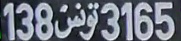

In [4]:
path="/content/drive/My Drive/ANPR-master/Licence_plate_recognition/Tunisian_plates/test.png"
img = cv2.imread(path)
cv2_imshow(img)

In [5]:
# list that will contains all digits
caracter_list_image = list()

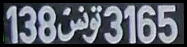

In [6]:
# Add black border to the image
BLACK = [0, 0, 0]
img = cv2.copyMakeBorder(img, 3, 3, 3, 3, cv2.BORDER_CONSTANT, value=BLACK)
cv2_imshow(img)

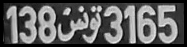

In [7]:
# change to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [8]:
# Change to numpy array format
nb = np.array(gray)  

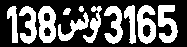

In [9]:
# Binarization
nb[nb > 120] = 255
nb[nb < 120] = 0
cv2_imshow(nb)

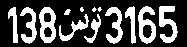

In [10]:
kernel = np.ones((2,2),np.uint8)
nb = cv2.erode(nb,kernel,iterations = 1)
cv2_imshow(nb)

In [11]:
# compute the sommation
x_sum = cv2.reduce(nb, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32S)
y_sum = cv2.reduce(nb, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32S)

In [12]:
# rotate the vector x_sum
x_sum = x_sum.transpose()

In [13]:
# get height and weight
x = gray.shape[1]
y = gray.shape[0]

In [14]:
# division the result by height and weight
x_sum = x_sum / y
y_sum = y_sum / x

In [15]:
# x_arr and y_arr are two vector weight and height to plot histogram projection properly
x_arr = np.arange(x)
y_arr = np.arange(y)

In [16]:
# convert x_sum to numpy array
z = np.array(x_sum)   

In [17]:
# convert y_arr to numpy array
w = np.array(y_sum)        

In [18]:
# convert to zero small details
z[z < 15] = 0
z[z > 15] = 1

In [19]:
# convert to zero small details and 1 for needed details
w[w < 20] = 0
w[w > 20] = 1

In [20]:
# vertical segmentation
test = z.transpose() * nb

In [21]:
# horizontal segmentation
test = w * test

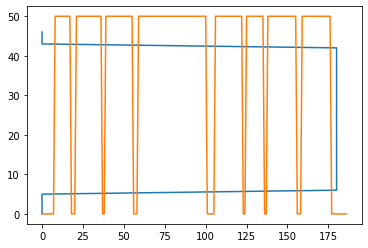

In [22]:
# plot histogram projection result using pyplot
horizontal = plt.plot(w*180, y_arr)
vertical = plt.plot(x_arr ,z*50)

plt.show(horizontal)
plt.show(vertical)

f = 0
ff = z[0]
t1 = list()
t2 = list()
for i in range(z.size):
    if z[i] != ff:
        f += 1
        ff = z[i]
        t1.append(i)
rect_h = np.array(t1)

f = 0
ff = w[0]
for i in range(w.size):
    if w[i] != ff:
        f += 1
        ff = w[i]
        t2.append(i)
rect_v = np.array(t2)

In [23]:
# take the appropriate height
rectv = []
rectv.append(rect_v[0])
rectv.append(rect_v[1])
max = int(rect_v[1]) - int(rect_v[0])
for i in range(len(rect_v) - 1):
    diff2 = int(rect_v[i + 1]) - int(rect_v[i])
    if diff2 > max:
        rectv[0] = rect_v[i]
        rectv[1] = rect_v[i + 1]
        max = diff2

In [24]:
# extract caracter
for i in range(len(rect_h) - 1):
# eliminate slice that can't be a digit, a digit must have width bigger then 8
    diff1 = int(rect_h[i + 1]) - int(rect_h[i])

    if (diff1 > 5) and (z[rect_h[i]] == 1):
        # cutting nb (image) and adding each slice to the list caracter_list_image
        caracter_list_image.append(nb[int(rectv[0]):int(rectv[1]), rect_h[i]:rect_h[i + 1]])

        # draw rectangle on digits
        cv2.rectangle(img, (rect_h[i], rectv[0]), (rect_h[i + 1], rectv[1]), (0, 255, 0), 1)

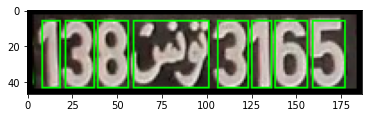

In [25]:
# Show segmentation result
image = plt.imshow(img)
plt.show(image)